In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')



# Data Preparation

- Removed categories in each column that had less than 1% representation in the data.
- Addressed anomalies, including:
  - Columns containing multiple airlines or airports.
  - Misclassified airlines that were actually bus or train companies (before the CSV was created).
- Categorized flight hours into morning, noon, evening, and night.
- Converted the float column for baggage to integers.
- Removed outliers using Tukey's method, focusing on entries with more than one outlier.
- Removed unnecessary columns.
- Created dummy variables to relevant columns.
- Added a day of the week dummy (departure and return)


In [23]:
data=pd.read_csv('WorkDB-28.02.25.csv')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179504 entries, 0 to 179503
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Origin                             179504 non-null  object 
 1   Destination                        179504 non-null  object 
 2   TTT                                179504 non-null  int64  
 3   LOS                                179504 non-null  int64  
 4   Departure Time                     179504 non-null  object 
 5   Departure Date                     179504 non-null  object 
 6   Arrival Time                       179504 non-null  object 
 7   Return Departure Time              179504 non-null  object 
 8   Return Date                        179504 non-null  object 
 9   Return Arrival Time                179504 non-null  object 
 10  Onward Departure Airport           179504 non-null  object 
 11  Onward Arrival Airport             1795

In [25]:
data.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Departure Time',
       'Departure Date', 'Arrival Time', 'Return Departure Time',
       'Return Date', 'Return Arrival Time', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Time', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)'],
      dtype='object')

In [26]:
data['Departure DateTime String']=(data['Departure Date']+' '+data['Departure Time'])
data['Return DateTime String']=(data['Return Date']+' '+data['Return Departure Time'])


In [27]:
data['Departure DateTime']=pd.to_datetime(data['Departure DateTime String'],format='%d/%m/%Y %H:%M')
data['Return DateTime']=pd.to_datetime(data['Return DateTime String'],format='%d/%m/%Y %H:%M')

c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


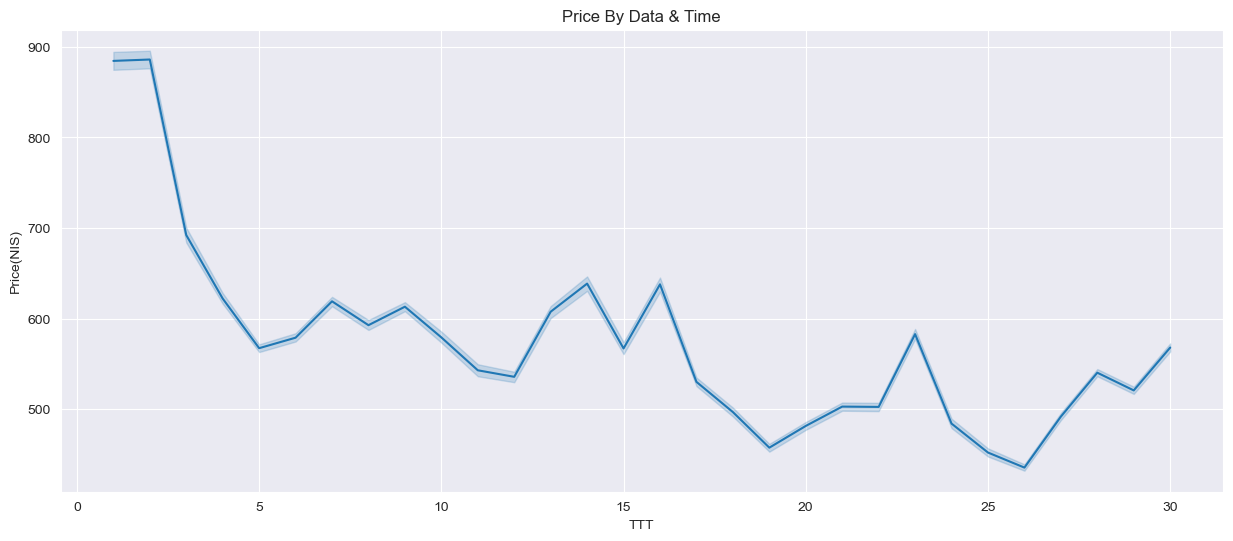

In [28]:
#Mean Price if there are 2 x's with the same value 
plt.figure(figsize=(15, 6))
sns.lineplot(data=data,x='TTT',y='Price(NIS)')
plt.ylabel("Price(NIS)")
plt.title("Price By Data & Time")
plt.show()

c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


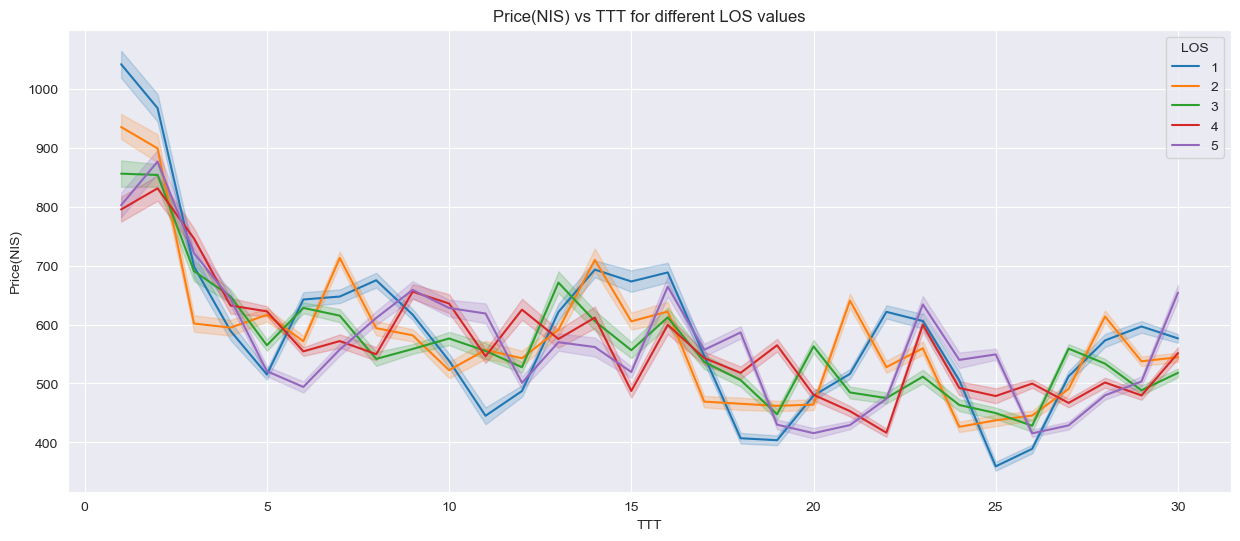

In [29]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='TTT', y='Price(NIS)', hue='LOS', data=data,palette="tab10")

plt.title('Price(NIS) vs TTT for different LOS values')
plt.xlabel('TTT')
plt.ylabel('Price(NIS)')
plt.legend(title='LOS')
plt.show()

In [30]:
numeric_data = data.select_dtypes(include='number')

price_corr = numeric_data.corr()['Price(NIS)'].drop('Price(NIS)')  # Drop self-correlation
print(price_corr)



TTT                                 -0.290521
LOS                                 -0.026307
Onward Flight Connections            0.048796
Onward Connection Duration(min)      0.007025
Return Flight Connections            0.052293
Return Connection Duration(min)      0.008062
Carry-ons                            0.309083
Checked Bags                         0.038802
Total Onward Flight Duration(min)    0.278803
Total Return Flight Duration(min)    0.262356
Name: Price(NIS), dtype: float64


c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


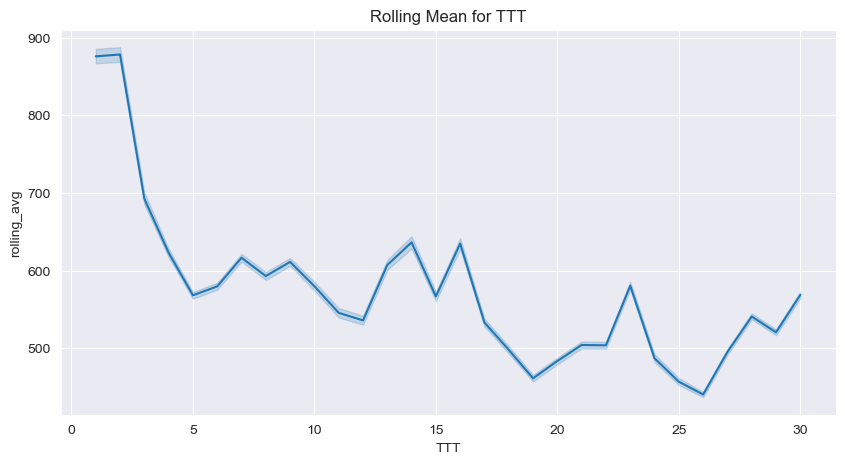

In [31]:
data['rolling_avg'] = data['Price(NIS)'].rolling(window=10).mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x="TTT", y="rolling_avg")
plt.title("Rolling Mean for TTT")
plt.show()

**Data Preparation:**

In [33]:
data.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Departure Time',
       'Departure Date', 'Arrival Time', 'Return Departure Time',
       'Return Date', 'Return Arrival Time', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Time', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)', 'Departure DateTime String',
       'Return DateTime String', 'Departure DateTime', 'Return DateTime',
       'rolling_avg'],
      dtype='object')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179504 entries, 0 to 179503
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             179504 non-null  object        
 1   Destination                        179504 non-null  object        
 2   TTT                                179504 non-null  int64         
 3   LOS                                179504 non-null  int64         
 4   Departure Time                     179504 non-null  object        
 5   Departure Date                     179504 non-null  object        
 6   Arrival Time                       179504 non-null  object        
 7   Return Departure Time              179504 non-null  object        
 8   Return Date                        179504 non-null  object        
 9   Return Arrival Time                179504 non-null  object        
 10  Onward Departure Air

In [35]:
data['Onward Airlines'].unique()

array(['Air France', 'Transavia France', 'easyJet', 'Vueling', 'Ryanair',
       'ITA Airways', 'Wizz Air', 'Iberia', 'Transavia France, Wizz Air',
       'Vueling, Ryanair', 'Vueling, Wizz Air', 'Ryanair, ITA Airways',
       'Ryanair, Wizz Air', 'Jet2', 'British Airways',
       'ITA Airways, Ryanair', 'Wizz Air, Wizz Air', 'Ryanair, easyJet',
       'Wizz Air, Ryanair', 'Aeroitalia, Ryanair',
       'Scandinavian Airlines', 'ITA Airways, Wizz Air', 'Eurowings',
       'Tunisair', 'Wizz Air, easyJet', 'Ryanair, Ryanair',
       'Austrian Airlines', 'KLM', 'Norwegian, Ryanair', 'Lufthansa',
       'Ryanair, Vueling', 'Vueling, Transavia France',
       'easyJet, Eurowings', 'Vueling, easyJet', 'Wizz Air, Air Albania',
       'Ryanair, Aeroitalia', 'easyJet, ITA Airways', 'easyJet, Volotea',
       'easyJet, Wizz Air', 'KM Malta Airlines', 'Wizz Air, Aeroitalia',
       'Norwegian', 'SWISS'], dtype=object)

In [36]:
print(data['Onward Airlines'].str.contains(',').sum())
print(data['Return Airlines'].str.contains(',').sum())
print(data['Onward Flight Connection Airport'].str.contains(',').sum())
print(data['Return Flight Connection Airport'].str.contains(',').sum())
print(data['Onward Flight Connection Airport'].str.contains('-').sum())
print(data['Return Flight Connection Airport'].str.contains('-').sum())




229
272
1
0
5
2


In [37]:
data['Onward Airlines'] = data['Onward Airlines'].str.split(',').str[0]
data['Return Airlines'] = data['Return Airlines'].str.split(',').str[0]
data['Onward Flight Connection Airport'] = data['Onward Flight Connection Airport'].str.split(',').str[0]
data['Onward Flight Connection Airport'] = data['Onward Flight Connection Airport'].str.split('-').str[0]
data['Return Flight Connection Airport'] = data['Return Flight Connection Airport'].str.split('-').str[0]



In [38]:
print(data['Onward Airlines'].str.contains(',').sum())
print(data['Return Airlines'].str.contains(',').sum())
print(data['Onward Flight Connection Airport'].str.contains(',').sum())
print(data['Return Flight Connection Airport'].str.contains(',').sum())
print(data['Onward Flight Connection Airport'].str.contains('-').sum())
print(data['Return Flight Connection Airport'].str.contains('-').sum())




0
0
0
0
0
0


In [39]:
#check for data with less than 1% 
for category in data.columns:
    category_counts = data[category].value_counts(normalize=True)
    rare_categories = category_counts[category_counts < 0.01]
    print(f"Rare categories in '{category}':")
    print(rare_categories)
    print()

Rare categories in 'Origin':
Series([], Name: proportion, dtype: float64)

Rare categories in 'Destination':
Series([], Name: proportion, dtype: float64)

Rare categories in 'TTT':
Series([], Name: proportion, dtype: float64)

Rare categories in 'LOS':
Series([], Name: proportion, dtype: float64)

Rare categories in 'Departure Time':
Departure Time
8:10     0.009732
18:25    0.009643
16:30    0.009498
10:00    0.009437
19:35    0.009415
           ...   
19:30    0.000022
19:10    0.000017
7:45     0.000006
22:30    0.000006
21:50    0.000006
Name: proportion, Length: 166, dtype: float64

Rare categories in 'Departure Date':
Series([], Name: proportion, dtype: float64)

Rare categories in 'Arrival Time':
Arrival Time
18:25      0.009855
19:05      0.009426
16:05      0.009365
20:05      0.009192
12:40      0.009147
             ...   
15:10+1    0.000006
9:05       0.000006
0:50       0.000006
23:20      0.000006
07:10+1    0.000006
Name: proportion, Length: 199, dtype: float64

Rare c

In [40]:
data = data[~data['Onward Departure Airport'].str.contains('SEN')]
data = data[~data['Onward Departure Airport'].str.contains('LCY')]
data = data[~data['Onward Arrival Airport'].str.contains('SEN')]
data = data[~data['Onward Arrival Airport'].str.contains('LCY')]
data = data[~data['Return Departure Airport'].str.contains('SEN')]
data = data[~data['Return Departure Airport'].str.contains('LCY')]
data = data[~data['Return Departure Airport'].str.contains('SOU')]
data = data[~data['Return Arrival Airport'].str.contains('SEN')]
data = data[~data['Return Arrival Airport'].str.contains('LCY')]
data = data[~data['Return Arrival Airport'].str.contains('SOU')]
data = data[~data['Onward Airlines'].str.contains('Iberia')]
data = data[~data['Onward Airlines'].str.contains('Scandinavian Airlines')]
data = data[~data['Onward Airlines'].str.contains('Eurowings')]
data = data[~data['Onward Airlines'].str.contains('Tunisair')]
data = data[~data['Onward Airlines'].str.contains('Lufthansa')]
data = data[~data['Onward Airlines'].str.contains('KLM')]
data = data[~data['Onward Airlines'].str.contains('Norwegian')]
data = data[~data['Onward Airlines'].str.contains('KM Malta Airlines')]
data = data[~data['Onward Airlines'].str.contains('Aeroitalia')]
data = data[~data['Onward Airlines'].str.contains('Austrian Airlines')]
data = data[~data['Onward Airlines'].str.contains('SWISS')]

data = data[~data['Return Airlines'].str.contains('Iberia')]
data = data[~data['Return Airlines'].str.contains('Scandinavian Airlines')]
data = data[~data['Return Airlines'].str.contains('Eurowings')]
data = data[~data['Return Airlines'].str.contains('Tunisair')]
data = data[~data['Return Airlines'].str.contains('Lufthansa')]
data = data[~data['Return Airlines'].str.contains('KLM')]
data = data[~data['Return Airlines'].str.contains('Norwegian')]
data = data[~data['Return Airlines'].str.contains('KM Malta Airlines')]
data = data[~data['Return Airlines'].str.contains('Aeroitalia')]
data = data[~data['Return Airlines'].str.contains('Austrian Airlines')]
data = data[~data['Return Airlines'].str.contains('SWISS')]
data = data[~data['Return Airlines'].str.contains('Volotea')]


In [41]:
data['Checked Bags'].fillna(0,inplace=True)
data['Checked Bags'] = data['Checked Bags'].astype(int)
data['Carry-ons'].fillna(0,inplace=True)
data['Carry-ons'] = data['Carry-ons'].astype(int)


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174969 entries, 0 to 179503
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             174969 non-null  object        
 1   Destination                        174969 non-null  object        
 2   TTT                                174969 non-null  int64         
 3   LOS                                174969 non-null  int64         
 4   Departure Time                     174969 non-null  object        
 5   Departure Date                     174969 non-null  object        
 6   Arrival Time                       174969 non-null  object        
 7   Return Departure Time              174969 non-null  object        
 8   Return Date                        174969 non-null  object        
 9   Return Arrival Time                174969 non-null  object        
 10  Onward Departure Airport 

In [43]:
#turn Hour to int
data['Departure Hour']=data['Departure Time'].str.split(':').str[0].astype(int)
data['Arrival Hour']=data['Arrival Time'].str.split(':').str[0].astype(int)
data['Return Departure Hour']=data['Return Departure Time'].str.split(':').str[0].astype(int)
data['Return Arrival Hour']=data['Return Arrival Time'].str.split(':').str[0].astype(int)

def categorize_time(time):
    if 0 <= time < 6:
        return 'Night'
    elif 6 <= time < 12:
        return 'Morning'
    elif 12 <= time < 18:
        return 'Noon'
    else:
        return 'Evening'

data['Onward Departure Time Of Day'] = data['Departure Hour'].apply(categorize_time)
data['Onward Arrival Time Of Day'] = data['Arrival Hour'].apply(categorize_time)
data['Return Departure Time Of Day'] = data['Return Departure Hour'].apply(categorize_time)
data['Return Arrival Time Of Day'] = data['Return Arrival Hour'].apply(categorize_time)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174969 entries, 0 to 179503
Data columns (total 42 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             174969 non-null  object        
 1   Destination                        174969 non-null  object        
 2   TTT                                174969 non-null  int64         
 3   LOS                                174969 non-null  int64         
 4   Departure Time                     174969 non-null  object        
 5   Departure Date                     174969 non-null  object        
 6   Arrival Time                       174969 non-null  object        
 7   Return Departure Time              174969 non-null  object        
 8   Return Date                        174969 non-null  object        
 9   Return Arrival Time                174969 non-null  object        
 10  Onward Departure Airport 

In [45]:
# Function to identify outliers using Tukey's method
def is_outlier(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (column < lower_bound) | (column > upper_bound)

# Identify outliers for each numeric column
numeric_columns = data.select_dtypes(include=['int64', 'int32', 'float64']).columns
outlier_flags = data[numeric_columns].apply(is_outlier)

# Count the number of outlier features for each row
data['outlier_count'] = outlier_flags.sum(axis=1)

# Print the rows and their corresponding outlier features
outlier_details = outlier_flags[data['outlier_count'] >= 2]
print("Rows to be removed and their corresponding outlier features:")
print(outlier_details[outlier_details.any(axis=1)])

# Remove rows with outliers in 2 or more features
rows_before = data.shape[0]
data_filtered = data[data['outlier_count'] < 3]
rows_after = data_filtered.shape[0]

# Drop the 'outlier_count' column as it's no longer needed
data_filtered = data_filtered.drop(columns=['outlier_count'])

print(f"\nTotal rows removed: {rows_before - rows_after}")




Rows to be removed and their corresponding outlier features:
          TTT    LOS  Onward Flight Connections  \
0       False  False                      False   
1       False  False                      False   
2       False  False                      False   
3       False  False                      False   
4       False  False                      False   
...       ...    ...                        ...   
179104  False  False                      False   
179107  False  False                       True   
179111  False  False                      False   
179112  False  False                      False   
179114  False  False                      False   

        Onward Connection Duration(min)  Return Flight Connections  \
0                                 False                      False   
1                                 False                       True   
2                                 False                      False   
3                                 False       

In [46]:
print(data.shape)
print(data_filtered.shape)


(174969, 43)
(170054, 42)


In [47]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170054 entries, 0 to 179503
Data columns (total 42 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             170054 non-null  object        
 1   Destination                        170054 non-null  object        
 2   TTT                                170054 non-null  int64         
 3   LOS                                170054 non-null  int64         
 4   Departure Time                     170054 non-null  object        
 5   Departure Date                     170054 non-null  object        
 6   Arrival Time                       170054 non-null  object        
 7   Return Departure Time              170054 non-null  object        
 8   Return Date                        170054 non-null  object        
 9   Return Arrival Time                170054 non-null  object        
 10  Onward Departure Airport 

In [48]:
data_filtered['Day Of Week Departure']=data['Departure DateTime'].dt.strftime('%A')
data_filtered['Day Of Week Return']=data['Return DateTime'].dt.strftime('%A')

In [ ]:
"""columns_to_drop = ['Origin', 'Destination','Departure Time','Departure Date','Arrival Time','Return Departure Time','Return Date','Return Arrival Time','Onward Flight Connection Airport','Return Flight Connection Airport'
,'Snapshot Time','Departure DateTime String','Departure DateTime','rolling_avg','Departure Hour','Arrival Hour','Return Departure Hour','Return Arrival Hour','Return DateTime','Return DateTime String']
data_filtered=data_filtered.drop(columns=columns_to_drop)"""

"columns_to_drop = ['Origin', 'Destination','Departure Time','Departure Date','Arrival Time','Return Departure Time','Return Date','Return Arrival Time','Onward Flight Connection Airport','Return Flight Connection Airport'\n,'Snapshot Time','Departure DateTime String','Departure DateTime','Departure Hour','Arrival Hour','Return Departure Hour','Return Arrival Hour','Return DateTime','Return DateTime String']\ndata_filtered=data_filtered.drop(columns=columns_to_drop)"

In [50]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170054 entries, 0 to 179503
Data columns (total 44 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             170054 non-null  object        
 1   Destination                        170054 non-null  object        
 2   TTT                                170054 non-null  int64         
 3   LOS                                170054 non-null  int64         
 4   Departure Time                     170054 non-null  object        
 5   Departure Date                     170054 non-null  object        
 6   Arrival Time                       170054 non-null  object        
 7   Return Departure Time              170054 non-null  object        
 8   Return Date                        170054 non-null  object        
 9   Return Arrival Time                170054 non-null  object        
 10  Onward Departure Airport 

In [51]:
data_filtered = pd.get_dummies(data_filtered, columns=['Onward Departure Airport', 'Onward Arrival Airport','Return Departure Airport','Return Arrival Airport','Onward Airlines','Return Airlines','Site','Onward Departure Time Of Day','Onward Arrival Time Of Day','Return Departure Time Of Day','Return Arrival Time Of Day','Day Of Week Departure','Day Of Week Return'],drop_first=True)

In [52]:
data_filtered.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Departure Time',
       'Departure Date', 'Arrival Time', 'Return Departure Time',
       'Return Date', 'Return Arrival Time',
       ...
       'Day Of Week Departure_Sunday', 'Day Of Week Departure_Thursday',
       'Day Of Week Departure_Tuesday', 'Day Of Week Departure_Wednesday',
       'Day Of Week Return_Monday', 'Day Of Week Return_Saturday',
       'Day Of Week Return_Sunday', 'Day Of Week Return_Thursday',
       'Day Of Week Return_Tuesday', 'Day Of Week Return_Wednesday'],
      dtype='object', length=104)

In [ ]:
numeric_data = data.select_dtypes(include='number')

price_corr = numeric_data.corr()['Price(NIS)'].drop('Price(NIS)')  # Drop self-correlation
print(price_corr)



TTT                                 -0.290514
LOS                                 -0.025849
Onward Flight Connections            0.035099
Onward Connection Duration(min)      0.000337
Return Flight Connections            0.042059
Return Connection Duration(min)      0.002619
Carry-ons                            0.312827
Checked Bags                         0.036617
Total Onward Flight Duration(min)    0.267853
Total Return Flight Duration(min)    0.250745
rolling_avg                          0.929924
Departure Hour                       0.001919
Arrival Hour                         0.050360
Return Departure Hour               -0.013528
Return Arrival Hour                  0.042275
outlier_count                        0.480816
Name: Price(NIS), dtype: float64


# ARIMA

In [78]:
arima_data_temp=data[['TTT','Price(NIS)']]
arima_data = arima_data.groupby("TTT").agg({"Price(NIS)": "mean"}).reset_index()


In [79]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(arima_data['Price(NIS)'])
print("p-value:", result[1])



p-value: 0.8877569209757137


In [80]:
arima_data['Price_diff'] = arima_data['Price(NIS)'].diff()


In [81]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(arima_data['Price_diff'].dropna())
print("p-value:", result[1])



p-value: 0.031749419139886714


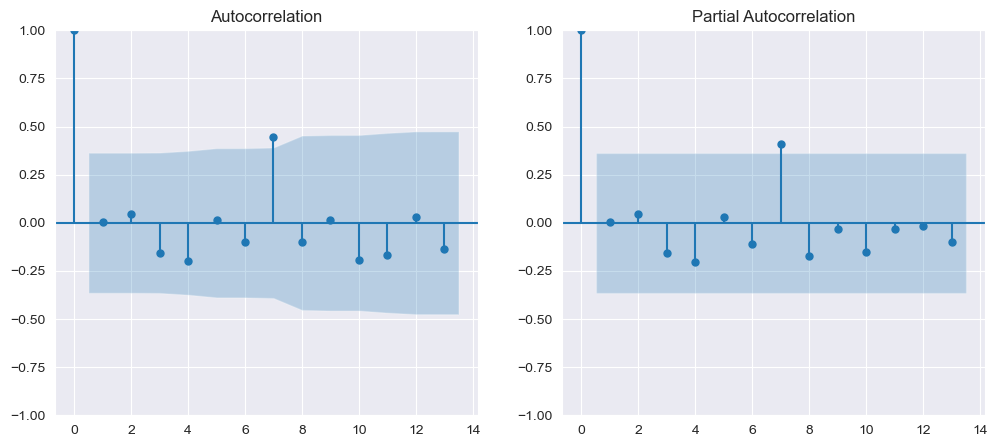

In [82]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_acf(arima_data['Price_diff'].dropna(),lags=13, ax=ax[0])  
plot_pacf(arima_data['Price_diff'].dropna(),lags=13, ax=ax[1]) 
plt.show()

- **AutoCorrelation** - Detarmines the each value is affected by its previous value with diffrent lags.
  - We can see that around lag 6 there is a spike in statistics.
- **PAC** - Detarmines the each value is affected by its previous value (after removing the influence of intermediate lags.)
  - We can see that around lag 6 there is a spike in statistics.

  -*Conclusion* - we will set q=6, p=6, d=1 (we did diff once)

In [83]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(arima_data['Price(NIS)'], order=(6,1,6))  
model_fit = model.fit()
print(model_fit.summary())

c:\Users\andri\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\andri\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:             Price(NIS)   No. Observations:                   30
Model:                 ARIMA(6, 1, 6)   Log Likelihood                -160.357
Date:                Tue, 04 Mar 2025   AIC                            346.714
Time:                        11:52:43   BIC                            364.489
Sample:                             0   HQIC                           352.281
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0641      0.080    -13.316      0.000      -1.221      -0.907
ar.L2         -1.1615      0.137     -8.507      0.000      -1.429      -0.894
ar.L3         -1.2435      0.186     -6.686      0.0

c:\Users\andri\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


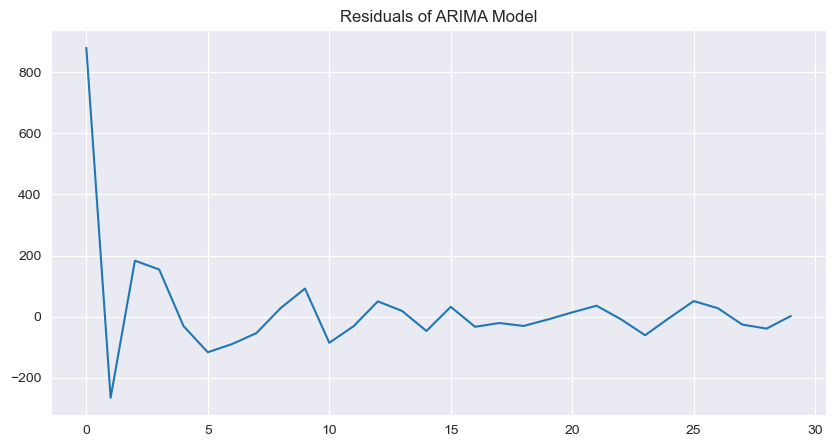

c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


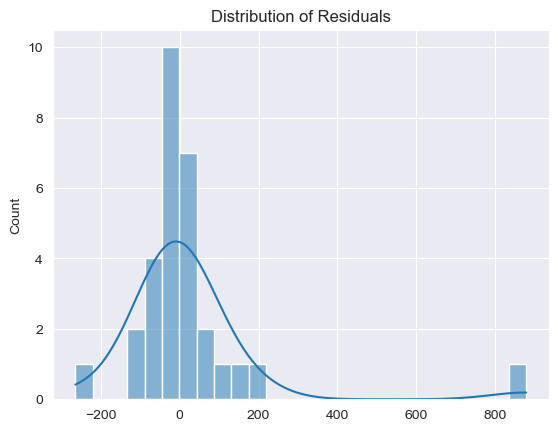

In [84]:
residuals = model_fit.resid
plt.figure(figsize=(10,5))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

# בדיקת התפלגות השאריות
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

The Residuals doesnt look like noise, means there are some trends that the Arima didnt Catch.
The Distribution is almost Normal.

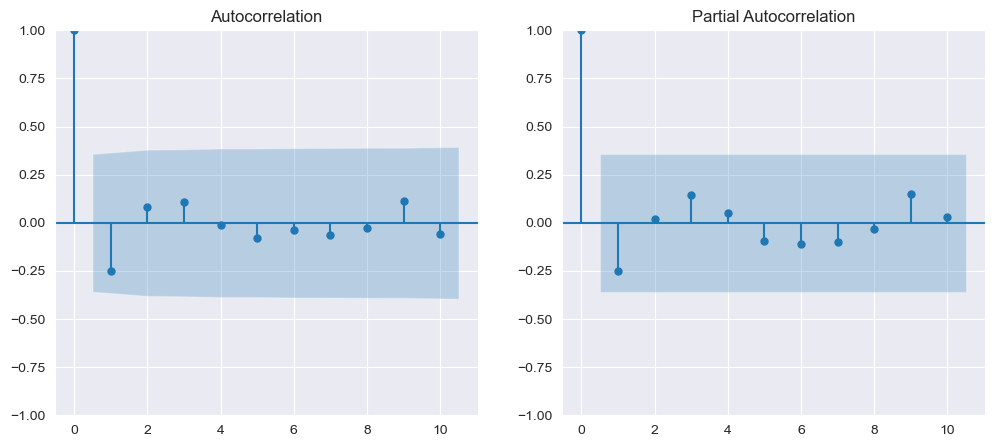

In [85]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(model_fit.resid,lags=10, ax=ax[0])
plot_pacf(model_fit.resid,lags=10, ax=ax[1])
plt.show()

*We Will Try Other p,q,d values*

In [112]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(arima_data['Price(NIS)'], order=(6,4,6))  
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Price(NIS)   No. Observations:                   30
Model:                 ARIMA(6, 4, 6)   Log Likelihood                -161.182
Date:                Tue, 04 Mar 2025   AIC                            348.365
Time:                        12:04:47   BIC                            364.720
Sample:                             0   HQIC                           353.075
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3578      0.147     -9.218      0.000      -1.646      -1.069
ar.L2         -1.5240      0.279     -5.456      0.000      -2.071      -0.977
ar.L3         -1.5252      0.346     -4.412      0.0

c:\Users\andri\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


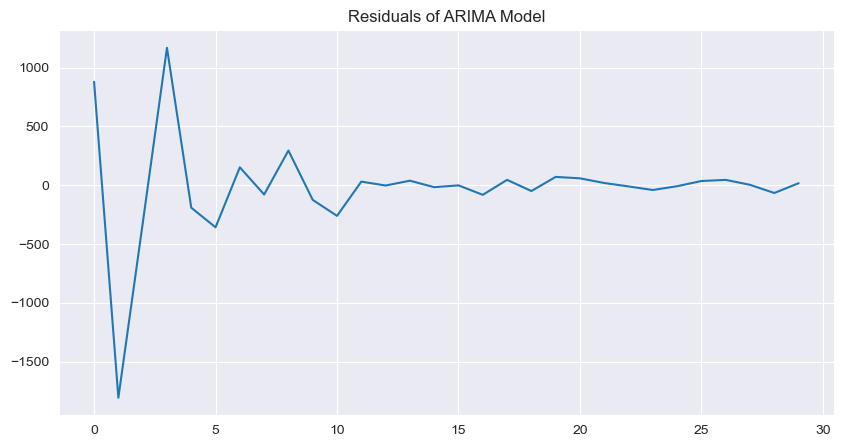

c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


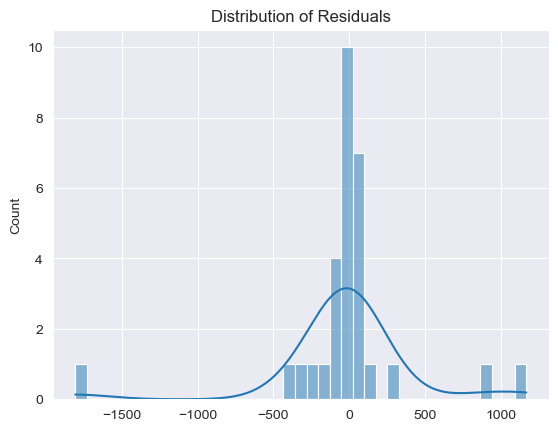

In [113]:
residuals = model_fit.resid
plt.figure(figsize=(10,5))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

# בדיקת התפלגות השאריות
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

In [117]:
import pmdarima as pm

model = pm.auto_arima(arima_data['Price(NIS)'], seasonal=False, stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=323.517, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=325.517, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=325.517, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=322.433, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=326.736, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.539 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -160.216
Date:                Tue, 04 Mar 2025   AIC                            322.433
Time:                        12:08:49   BIC                            323.800
Sample:                             0   HQIC                           322.861
                    

In [118]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(arima_data['Price(NIS)'], order=(0,1,0))  
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Price(NIS)   No. Observations:                   30
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -160.216
Date:                Tue, 04 Mar 2025   AIC                            322.433
Time:                        12:09:31   BIC                            323.800
Sample:                             0   HQIC                           322.861
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3683.0562    770.486      4.780      0.000    2172.931    5193.181
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.28
Prob(Q):                              0.99   Pr

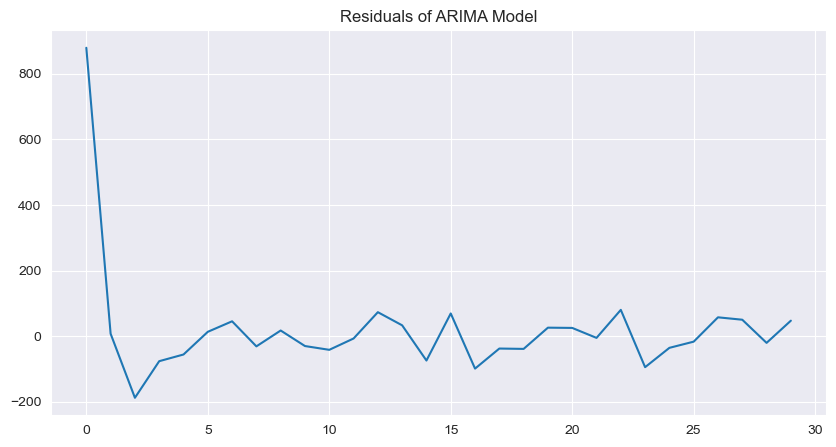

c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


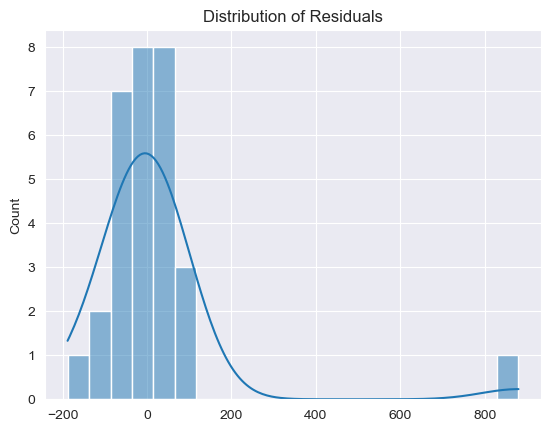

In [119]:
residuals = model_fit.resid
plt.figure(figsize=(10,5))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

# בדיקת התפלגות השאריות
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

**It Looks like the model doesnt work for that data, which means that TTT & Price doesn't look like a series and not able to predict the prices.**

# Sarima

In [122]:
arima_data=arima_data.drop('Price_diff',axis=1)

In [123]:
sarima_data=arima_data

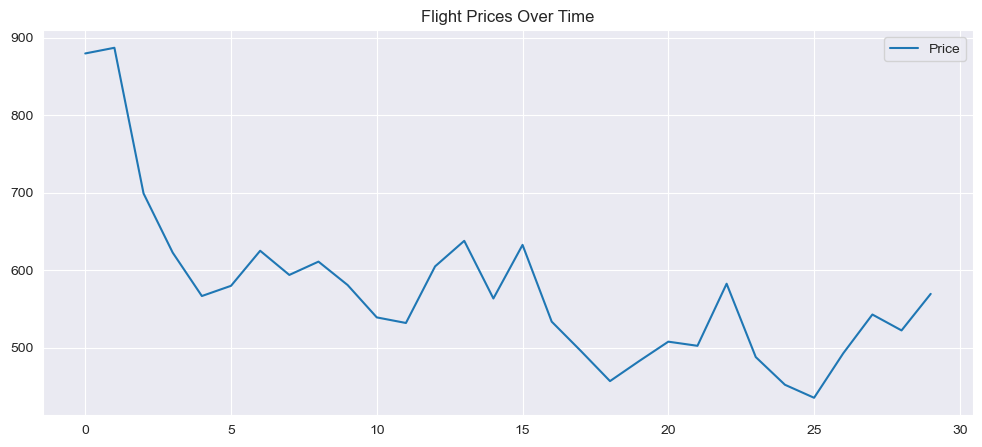

In [125]:
plt.figure(figsize=(12,5))
plt.plot(sarima_data['Price(NIS)'], label='Price')
plt.title('Flight Prices Over Time')
plt.legend()
plt.show()

*check seasosinality*

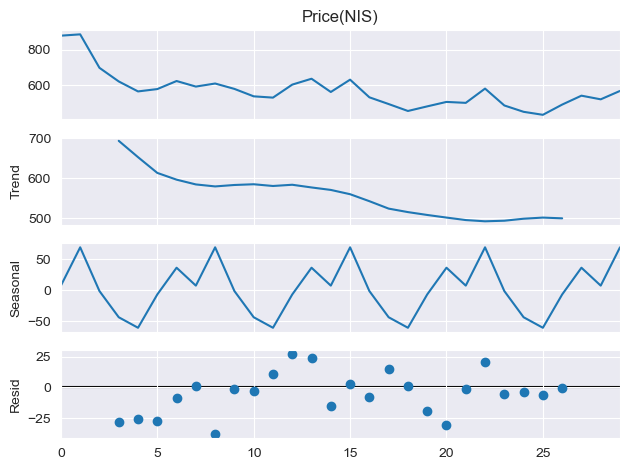

In [132]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(sarima_data['Price(NIS)'], model='additive', period=7)  # אם הנתונים יומיים ויש מחזוריות שבועית

result.plot()
plt.show()

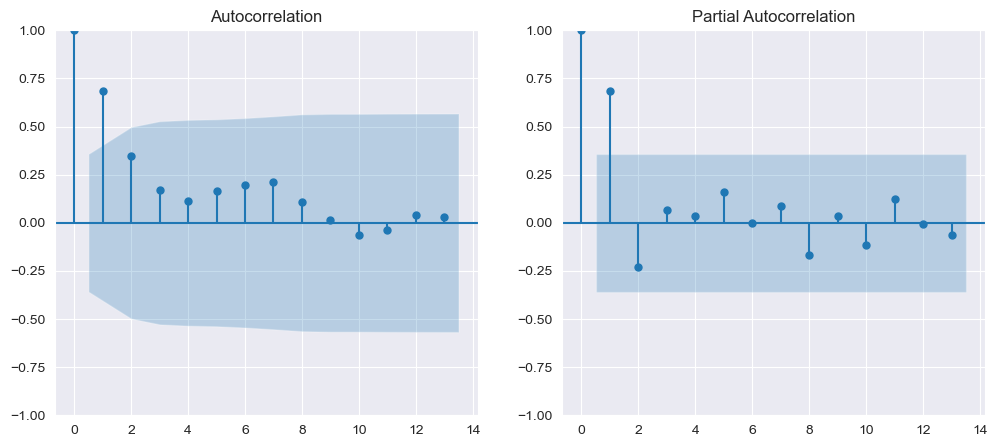

In [127]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_acf(sarima_data['Price(NIS)'],lags=13, ax=ax[0])
plot_pacf(sarima_data['Price(NIS)'],lags=13, ax=ax[1])
plt.show()

In [150]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# הגדרת המודל עם סדרת מחירים
model = SARIMAX(sarima_data['Price(NIS)'], order=(3,1,3), seasonal_order=(1,1,1,7))

# התאמת המודל לנתונים
model_fit = model.fit()

# הצגת תוצאות המודל
print(model_fit.summary())

c:\Users\andri\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\andri\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                      SARIMAX Results                                      
Dep. Variable:                          Price(NIS)   No. Observations:                   30
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 7)   Log Likelihood                -109.637
Date:                             Tue, 04 Mar 2025   AIC                            237.274
Time:                                     12:30:00   BIC                            247.094
Sample:                                          0   HQIC                           239.587
                                              - 30                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3263      0.604     -0.540      0.589      -1.511       0.858
ar.L2          0.4447      

c:\Users\andri\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


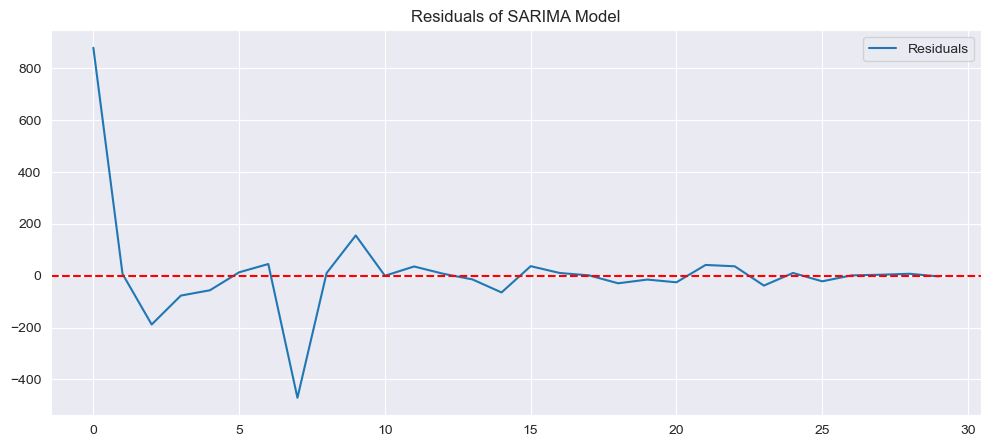

In [151]:
residuals = model_fit.resid

plt.figure(figsize=(12,5))
plt.plot(residuals, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals of SARIMA Model")
plt.legend()
plt.show()


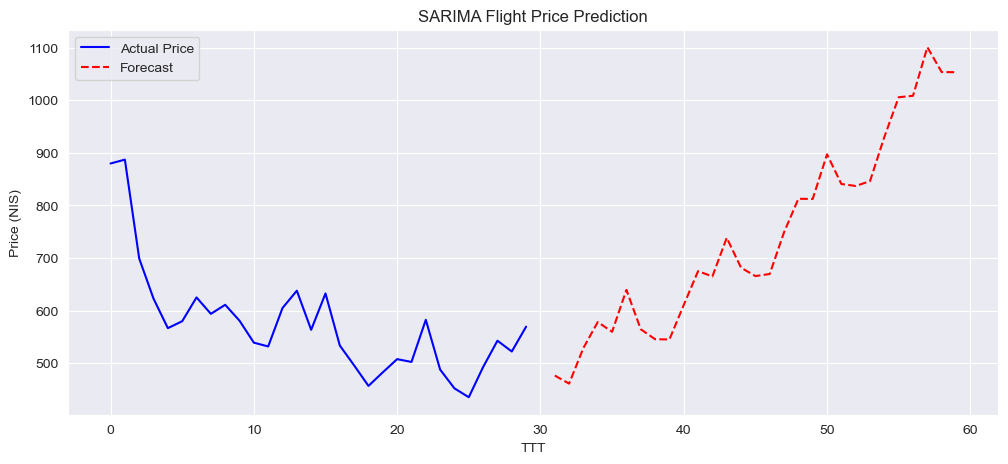

In [152]:
forecast_steps = 30

# יצירת תחזית
forecast_values = model_fit.predict(start=len(sarima_data), end=len(sarima_data) + forecast_steps - 1)

# יצירת אינדקס מתאים עבור התחזית
forecast_index = np.arange(len(sarima_data) + 1, len(sarima_data) + 1 + forecast_steps)

# שמירת התחזית ב-DataFrame חדש
forecast_df = pd.DataFrame({'Forecast': forecast_values}, index=forecast_index)

# שרטוט הגרף
plt.figure(figsize=(12,5))
plt.plot(sarima_data.index, sarima_data['Price(NIS)'], label='Actual Price', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', linestyle='dashed', color='red')

plt.legend()
plt.title("SARIMA Flight Price Prediction")
plt.xlabel("TTT")
plt.ylabel("Price (NIS)")
plt.show()

*As we can see the algo didnt quite catch the prediction, it catched the rise in prices but the data is not in series style, so it would not predict good in a long term.*